# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import io
import os
import glob


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np 

import tensorflow.compat.v1 as tf
from waymo_open_dataset import dataset_pb2 as open_dataset

from utils import parse_frame, int64_feature, int64_list_feature, bytes_feature, \
    bytes_list_feature, float_list_feature, get_dataset

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [2]:
dataset = get_dataset("data/train/*")
dataset

INFO:tensorflow:Reading unweighted datasets: ['data/train/*']
INFO:tensorflow:Reading record datasets for input file: ['data/train/*']
INFO:tensorflow:Number of filenames to read: 80
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

In [3]:
# Specifiy colors for each class
colors =  colors = {1:'r',2:'g',4: 'b'}
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    %matplotlib inline
    img = batch['image'].numpy()
    f, ax = plt.subplots(1, figsize=(6, 8))
    ax.imshow(img)
     
    boxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    
    w= img.shape[0]
    h= img.shape[1]
    
    boxes[:,(0,2)] *= h
    boxes[:,(1,3)] *= w
    
    for box,class_box in zip(boxes,classes):
        y1,x1 , y2,x2 = box
        
        color_class = colors[class_box]
        rect = patches.Rectangle(
            (x1,y1),
            x2-x1,y2-y1,
            edgecolor=color_class,
            fill=False)
        ax.add_patch(rect)
        
    plt.xlabel('width (pixel)', fontsize=18)
    plt.ylabel('height (pixel)', fontsize=16)
    plt.grid(False)
    plt.show()
    return

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

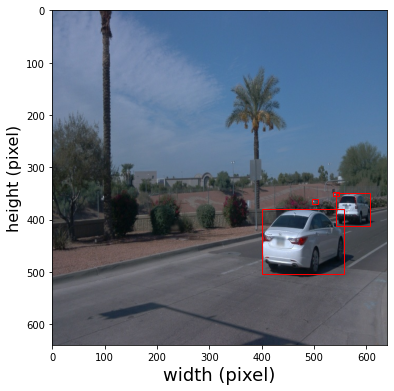

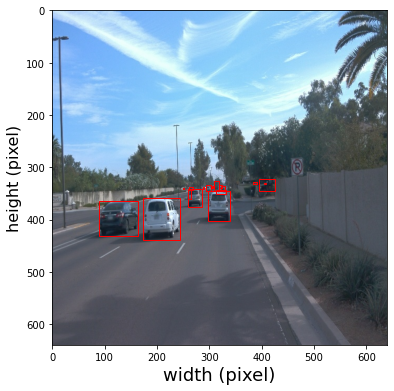

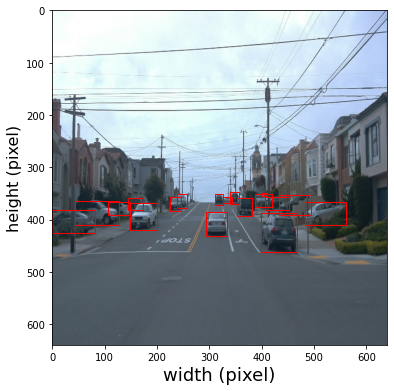

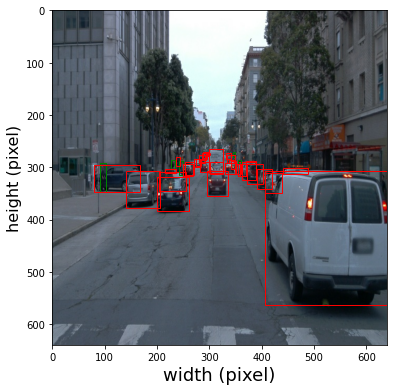

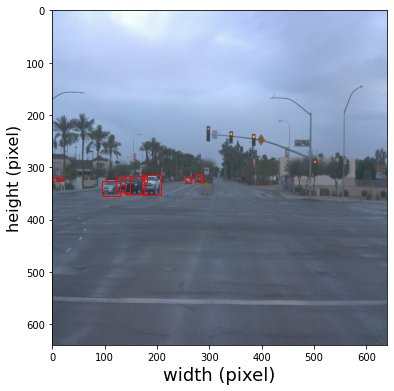

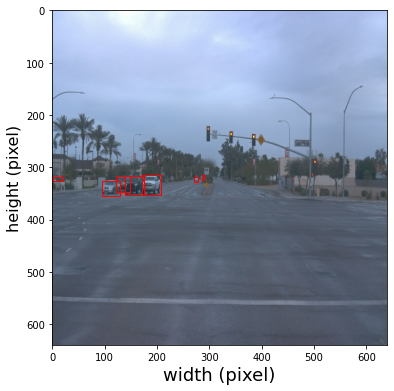

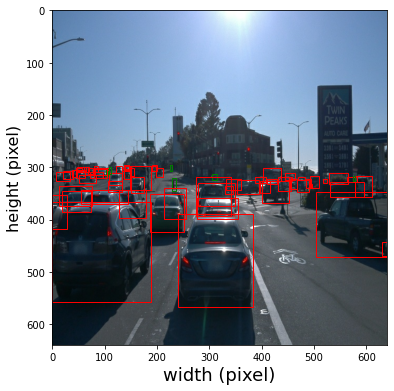

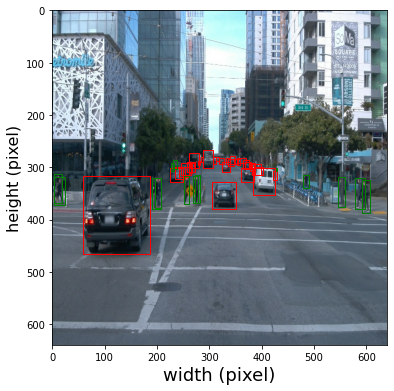

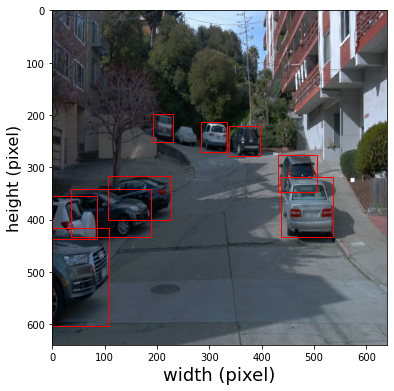

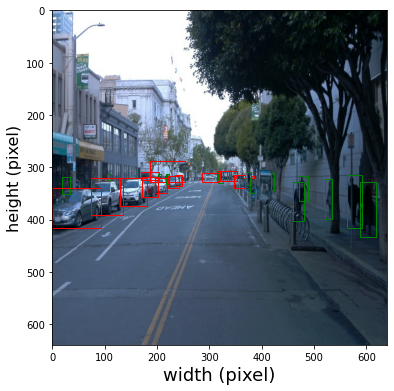

In [4]:
## STUDENT SOLUTION HERE
selected_dataset = dataset.shuffle(80,seed=12)
selected_dataset = selected_dataset.take(10)
print(selected_dataset)
for batch in selected_dataset:
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...